## Boston House Price Prediction

### Introduction About The Data:

The goal is to predict house `price` in Boston (Regression Analysis).

There are 13 independent variables:

* `CRIM` : per capita crime rate by town
* `ZN` : proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` : proportion of non-retail business acres per town
* `CHAS` : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `NOX` : nitric oxides concentration (parts per 10 million)
* `RM` : average number of rooms per dwelling
* `AGE` : proportion of owner-occupied units built prior to 1940
* `DIS` : weighted distances to five Boston employment centres
* `RAD` : index of accessibility to radial highways
* `TAX` : full-value property-tax rate per $10,000
* `PTRATIO` : pupil-teacher ratio by town
* `B` : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` : % lower status of the population

Target variable:
* `MEDV` : Median value of owner-occupied homes in $1000's

Dataset Source Link:
[http://lib.stat.cmu.edu/datasets/boston](http://lib.stat.cmu.edu/datasets/boston)

In [1]:
import pandas as pd

In [2]:
## Data Ingestions step
df = pd.read_csv('data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
### No missing values present in the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
## check for duplicated records
df.duplicated().sum()

0

In [7]:
## segregate numerical and categorical columns

numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']

print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


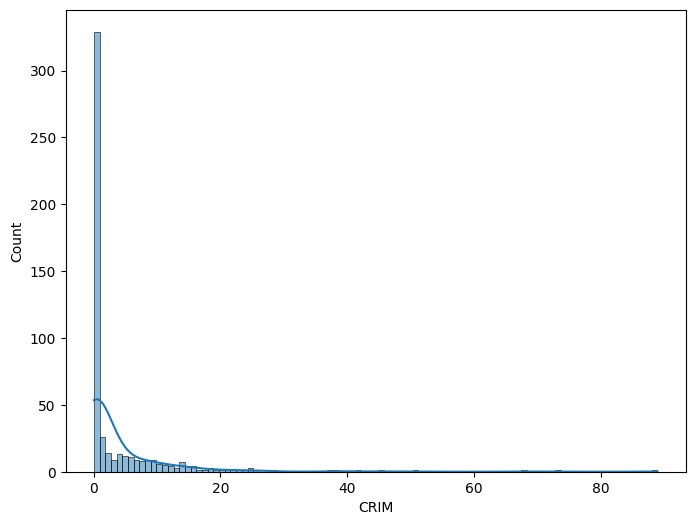

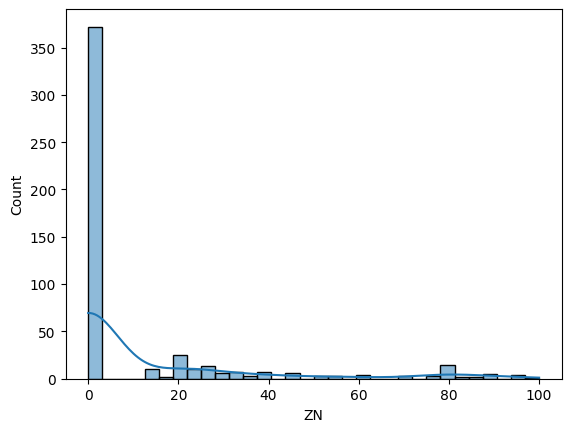

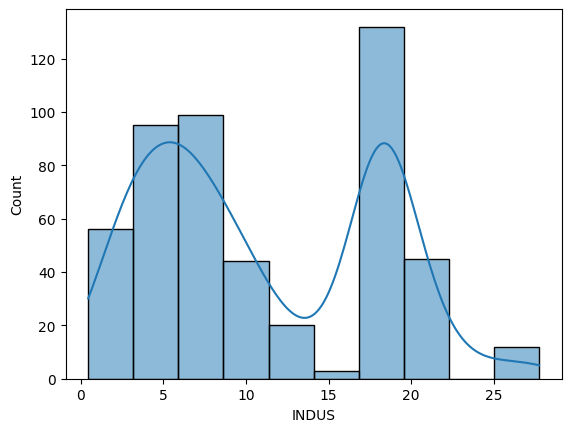

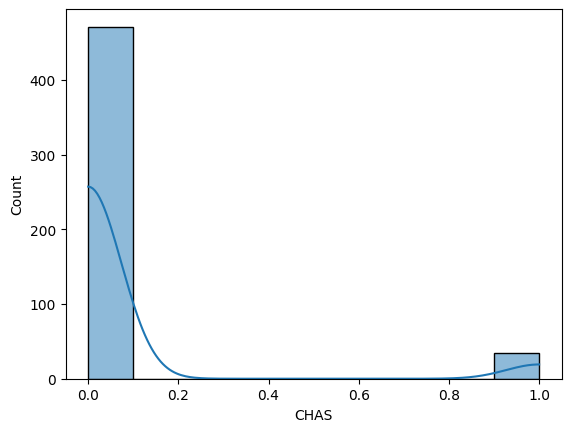

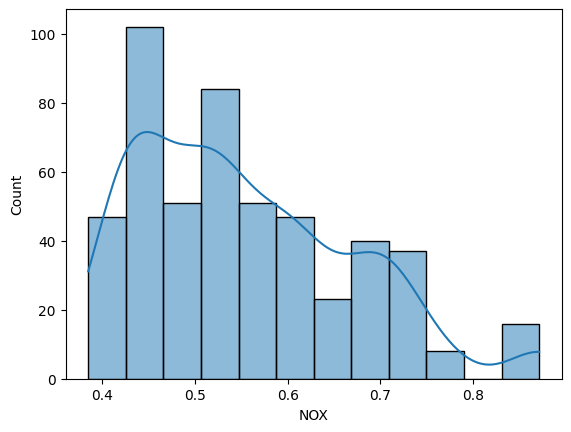

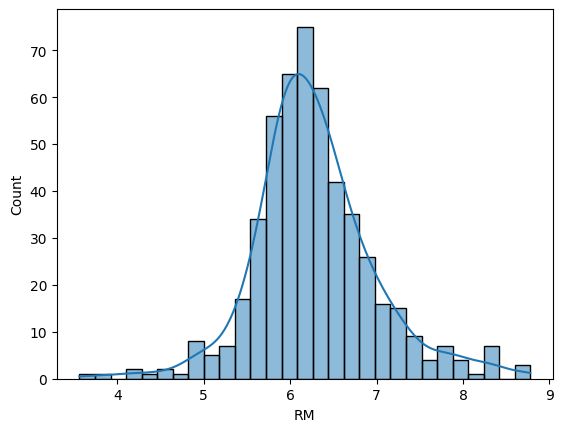

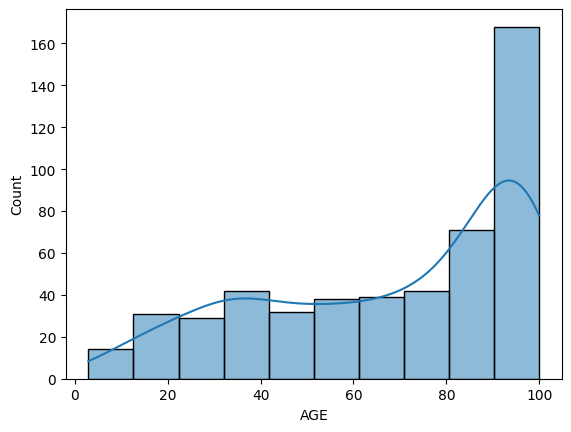

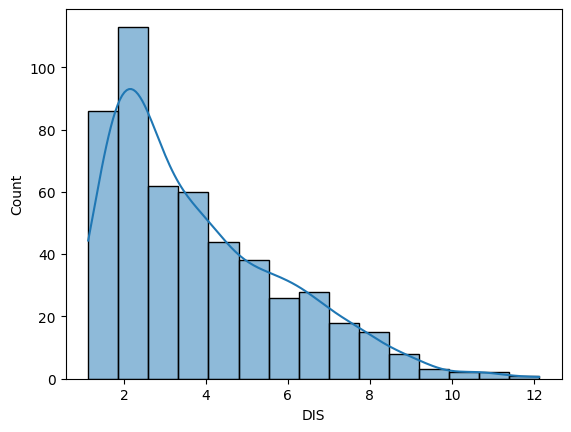

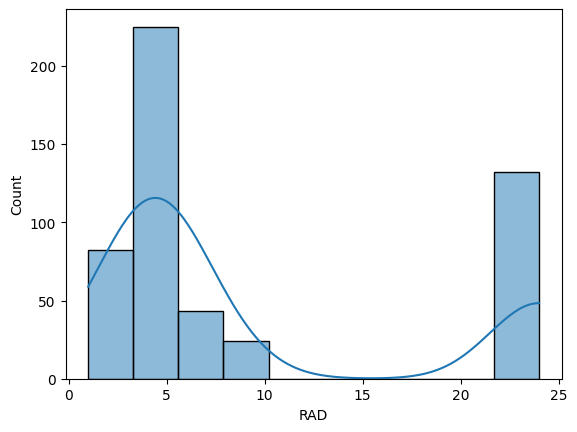

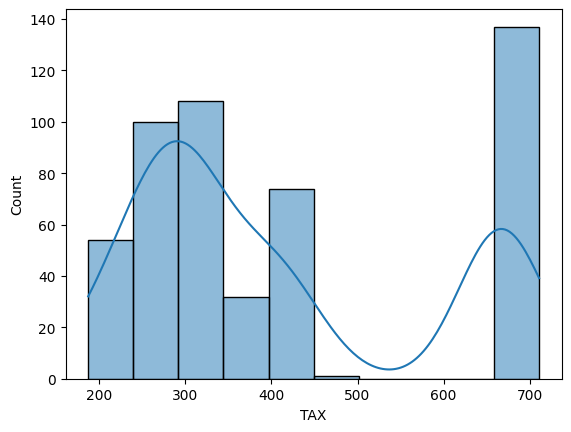

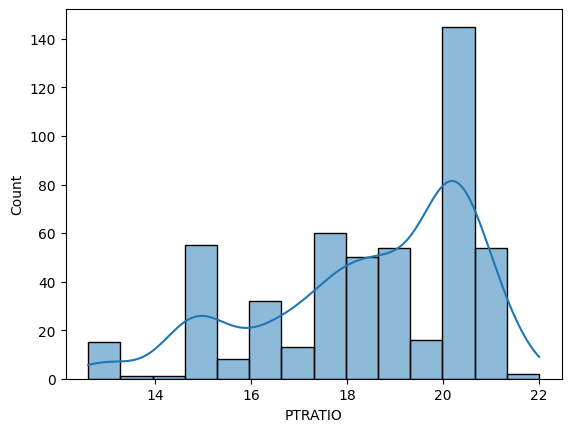

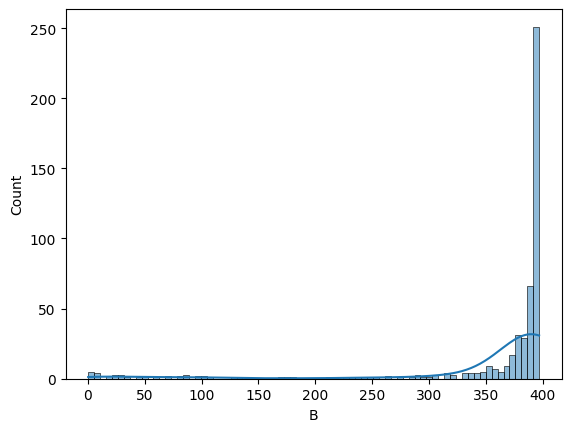

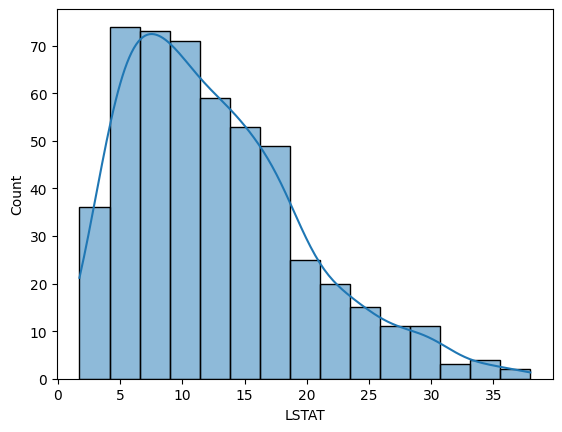

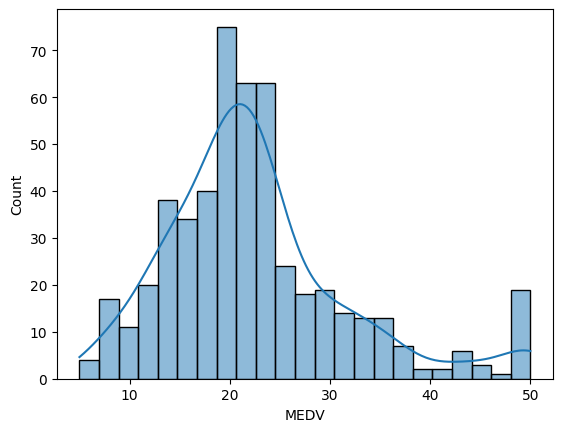

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
# x = 0
for i in numerical_columns:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()

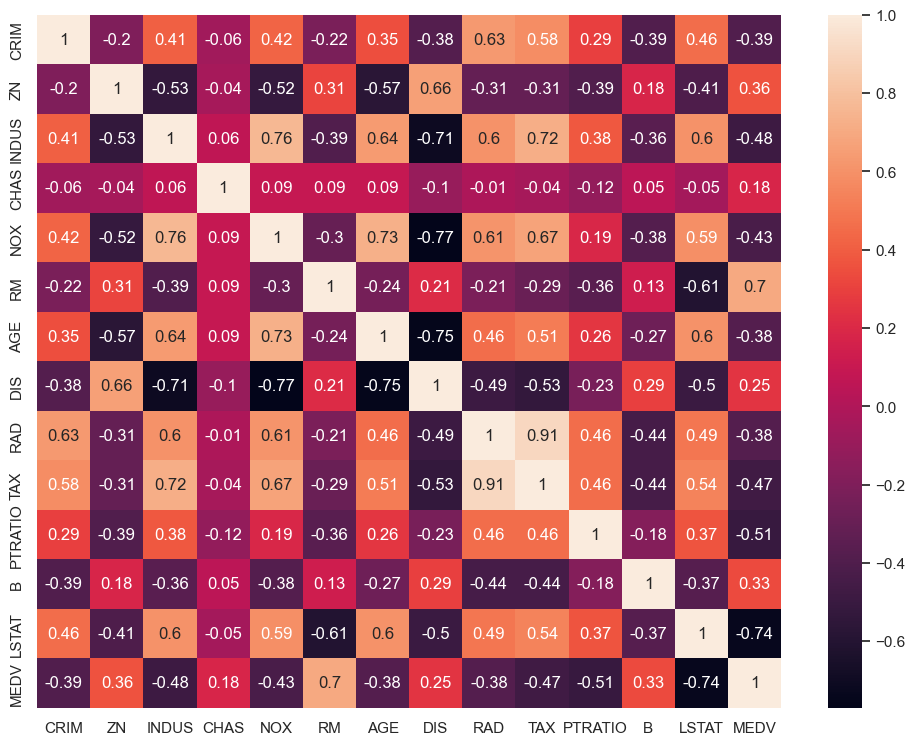

In [15]:
## correlation
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
## Correlation status

# intercorrelation observed for following features: 

# 1) INDUS vs NOX, DIS, TAX -> 0.76, -0.71, 0.72
# 2) NOX vs AGE, DIS -> 0.73, -0.77 
# 3) AGE vs DIS -> -0.75
# 4) RAD vs TAX -> 0.91
# 5) MEDV vs RM, LSTAT -> 0.7, -0.74